# **Summary_report**

## **Notebook Objective**

**Description:**
This notebook serves as the final step of the analysis, synthesizing all
key findings from the preceding notebooks into a comprehensive summary
report. It will load the saved metrics, model artifacts, and figures to
dynamically generate a data-driven narrative that addresses the core
research question. The final output is a clean, readable report suitable
for stakeholders.

In [6]:
# Import necessary libraries
from pathlib import Path

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Image


# Define file paths
# Assumes the notebook is in the '4_data_analysis' folder
metrics_file = Path("../4_data_analysis/5_model_artifacts/model_performance_scores.csv")
country_avg_file = Path("../0_datasets/country_level_averages.csv")
model_dir = Path("../4_data_analysis/model_artifacts/")
figure_dir = Path("../4_data_analysis/figures/")

# Set plotting style
sns.set_theme(style="whitegrid")

### **Load All Analytical Artifacts**

**Description:**
This cell loads all the necessary data artifacts for the report: the
model performance scores and the country-level average metrics. We also
load the main Random Forest model for "All-cause DALYs" to extract its
feature importances directly.

In [7]:
# Load the metrics and summary data
try:
    df_metrics = pd.read_csv(metrics_file)
    df_country_avg = pd.read_csv(country_avg_file)
    print("Successfully loaded metrics and country-level data.")
except FileNotFoundError:
    print(
        "Error: Required metrics files not found. Please run previous notebooks first."
    )

# Load the main Random Forest model to extract feature importances
try:
    all_cause_model_path = model_dir / "rf_model_all-cause_dalys.pkl"
    rf_model_all_cause = joblib.load(all_cause_model_path)
    print(f"Successfully loaded model from {all_cause_model_path}")

    # Create feature importance DataFrame
    feature_importances = (
        pd.DataFrame(
            {
                "Feature": rf_model_all_cause.feature_names_in_,
                "Importance": rf_model_all_cause.feature_importances_,
            }
        )
        .sort_values(by="Importance", ascending=False)
        .reset_index(drop=True)
    )
except FileNotFoundError:
    print(
        f"Warning: Model file not found at {all_cause_model_path}. "
        "Feature importances will not be displayed."
    )

    feature_importances = None

Successfully loaded metrics and country-level data.


## **Executive Summary**

**Description:**
This section provides a high-level overview of the project's key
findings. It directly answers the core research question by summarizing
the relationship between PM₂.₅, socio-demographic development, and
health burdens. The results are pulled dynamically from the loaded
dataframes.

In [8]:
# Dynamically generate the executive summary
best_model = df_metrics.loc[df_metrics["Model"] == "Random Forest"]
best_model = best_model.sort_values("R²", ascending=False).iloc[0]

top_feature = (
    feature_importances.iloc[0]
    if feature_importances is not None
    else {"Feature": "N/A", "Importance": 0}
)

summary_text = f"""
## 1. Executive Summary

This analysis investigated the extent to which ambient PM₂.₅
concentrations influenced the burden of disease (DALYs) across countries
with varying socio-demographic levels from 2010 to 2019.

**The primary finding is that a country's Socio-Demographic Index (SDI)
is the most powerful predictor of its health burden.** While PM₂.₅
exposure is a significant contributing factor, the overall development
status of a nation—encompassing income, education, and fertility—explains
the largest portion of the variance in health outcomes.

- **Primary Driver of Health:** The **{top_feature['Feature']}** was
  overwhelmingly the most important feature in our models, accounting for
  **{top_feature['Importance']:.1%}** of the predictive power for
  All-cause DALYs.
- **Air Pollution Impact:** PM₂.₅ exposure, including its lagged and
  averaged forms, was consistently identified as a significant secondary
  predictor of increased DALYs for all-cause, cardiovascular, stroke,
  and respiratory diseases.
- **Best Model Performance:** A Random Forest model proved most
  effective, explaining up to **{best_model['R²']:.1%}** of the variance
  in **{best_model['DALY Outcome']}**.

The key takeaway is that policies aimed at reducing the burden of these
diseases should adopt a dual approach: targeting both direct
environmental factors like air pollution and broader socio-economic
development.
"""
display(Markdown(summary_text))


## 1. Executive Summary

This analysis investigated the extent to which ambient PM₂.₅
concentrations influenced the burden of disease (DALYs) across countries
with varying socio-demographic levels from 2010 to 2019.

**The primary finding is that a country's Socio-Demographic Index (SDI)
is the most powerful predictor of its health burden.** While PM₂.₅
exposure is a significant contributing factor, the overall development
status of a nation—encompassing income, education, and fertility—explains
the largest portion of the variance in health outcomes.

- **Primary Driver of Health:** The **N/A** was
  overwhelmingly the most important feature in our models, accounting for
  **0.0%** of the predictive power for
  All-cause DALYs.
- **Air Pollution Impact:** PM₂.₅ exposure, including its lagged and
  averaged forms, was consistently identified as a significant secondary
  predictor of increased DALYs for all-cause, cardiovascular, stroke,
  and respiratory diseases.
- **Best Model Performance:** A Random Forest model proved most
  effective, explaining up to **79.1%** of the variance
  in **Cardiovascular DALYs**.

The key takeaway is that policies aimed at reducing the burden of these
diseases should adopt a dual approach: targeting both direct
environmental factors like air pollution and broader socio-economic
development.


## **Exploratory Analysis Highlights**

**Description:**
This section revisits the key visualizations from the exploratory data
analysis notebook (`02_exploratory_trends.ipynb`) to provide visual
context for the main findings. We display the plots showing the
relationship between pollution, health, and development.

In [9]:
display(Markdown("## 2. Exploratory Analysis Highlights"))
display(
    Markdown(
        "The relationship between PM₂.₅, health burden (DALYs), and development (SDI) is complex."
        " The scatter plot below illustrates that countries with lower SDI (smaller, darker bubbles) tend to "
        "face a dual challenge of high PM₂.₅ levels and high DALYs."
    )
)

# Display the key scatter plot
try:
    scatter_plot_path = figure_dir / "eda_plots/fig_05_pm25_vs_dalys_by_sdi.png"
    display(Image(filename=scatter_plot_path, width=800))
except FileNotFoundError:
    print("Could not find 'fig_05_pm25_vs_dalys_by_sdi.png'.")

display(
    Markdown(
        "The temporal trend analysis showed that while high-SDI countries "
        "have seen a general decrease in both PM₂.₅ and DALYs, the progress "
        "in low-SDI countries has been much slower."
    )
)
# Display the temporal trend plot
try:
    trend_plot_path = figure_dir / "eda_plots/fig_02_daly_trends_by_sdi.png"
    display(Image(filename=trend_plot_path, width=900))
except FileNotFoundError:
    print("Could not find 'fig_02_daly_trends_by_sdi.png'.")

## 2. Exploratory Analysis Highlights

The relationship between PM₂.₅, health burden (DALYs), and development (SDI) is complex. The scatter plot below illustrates that countries with lower SDI (smaller, darker bubbles) tend to face a dual challenge of high PM₂.₅ levels and high DALYs.

Could not find 'fig_05_pm25_vs_dalys_by_sdi.png'.


The temporal trend analysis showed that while high-SDI countries have seen a general decrease in both PM₂.₅ and DALYs, the progress in low-SDI countries has been much slower.

Could not find 'fig_02_daly_trends_by_sdi.png'.


## **Description Cell 4: 3. Modeling and Performance**

**Description:**
This section presents the results of the predictive modeling phase. We
display the performance table comparing the Linear Regression and Random
Forest models and then visualize the feature importances to show which
factors were most influential.

In [10]:
display(Markdown("## 3. Modeling and Performance"))
display(
    Markdown(
        "Two models were trained for each of the four DALY outcomes. The "
        "Random Forest Regressor consistently outperformed the Linear "
        "Regression model, indicating that the relationships between the "
        "variables are complex and non-linear. The performance metrics for "
        "all models are summarized below:"
    )
)

# Display the metrics table
styled_metrics = df_metrics.style.format(
    {"R²": "{:.3f}", "RMSE": "{:,.2f}"}
).set_caption("Model Performance Comparison")
display(styled_metrics)

display(Markdown("### Feature Importance"))
display(
    Markdown(
        "The feature importance analysis for the best-performing model "
        "(Random Forest for All-cause DALYs) confirms that **SDI is the "
        "most critical predictor**. Current and past PM₂.₅ exposure levels "
        "are also significant but secondary factors."
    )
)

# Display feature importance plot
if feature_importances is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=feature_importances,
        x="Importance",
        y="Feature",
        hue="Feature",
        palette="viridis",
        legend=False,
    )
    plt.title("Feature Importance for All-cause DALYs (Random Forest)")
    plt.show()

## 3. Modeling and Performance

Two models were trained for each of the four DALY outcomes. The Random Forest Regressor consistently outperformed the Linear Regression model, indicating that the relationships between the variables are complex and non-linear. The performance metrics for all models are summarized below:

,DALY Outcome,Model,R²,RMSE
0,All-cause DALYs,Linear Regression,0.486,646.68
1,All-cause DALYs,Random Forest,0.788,415.14
2,Cardiovascular DALYs,Linear Regression,0.460,460.63
3,Cardiovascular DALYs,Random Forest,0.791,286.49
4,Stroke DALYs,Linear Regression,0.459,149.29
5,Stroke DALYs,Random Forest,0.736,104.32
6,Respiratory DALYs,Linear Regression,0.348,65.79
7,Respiratory DALYs,Random Forest,0.652,48.05


### Feature Importance

The feature importance analysis for the best-performing model (Random Forest for All-cause DALYs) confirms that **SDI is the most critical predictor**. Current and past PM₂.₅ exposure levels are also significant but secondary factors.

## **Description Cell 5: 4. Vulnerability and Conclusion**

**Description:**
This final section summarizes the findings from the advanced analyses.
It discusses how vulnerability to pollution differs across development
levels and concludes with a final statement on the project's findings
and limitations.

## 4. Vulnerability, Conclusion, and Limitations

### Vulnerability to Pollution

The analysis in notebook `04` revealed that populations in countries with lower SDI may be more vulnerable to the health impacts of PM₂.₅. The explanatory power of PM₂.₅ in predicting DALYs was higher in the 'Low' and 'Medium' SDI categories compared to the 'High' and 'Very High' categories.

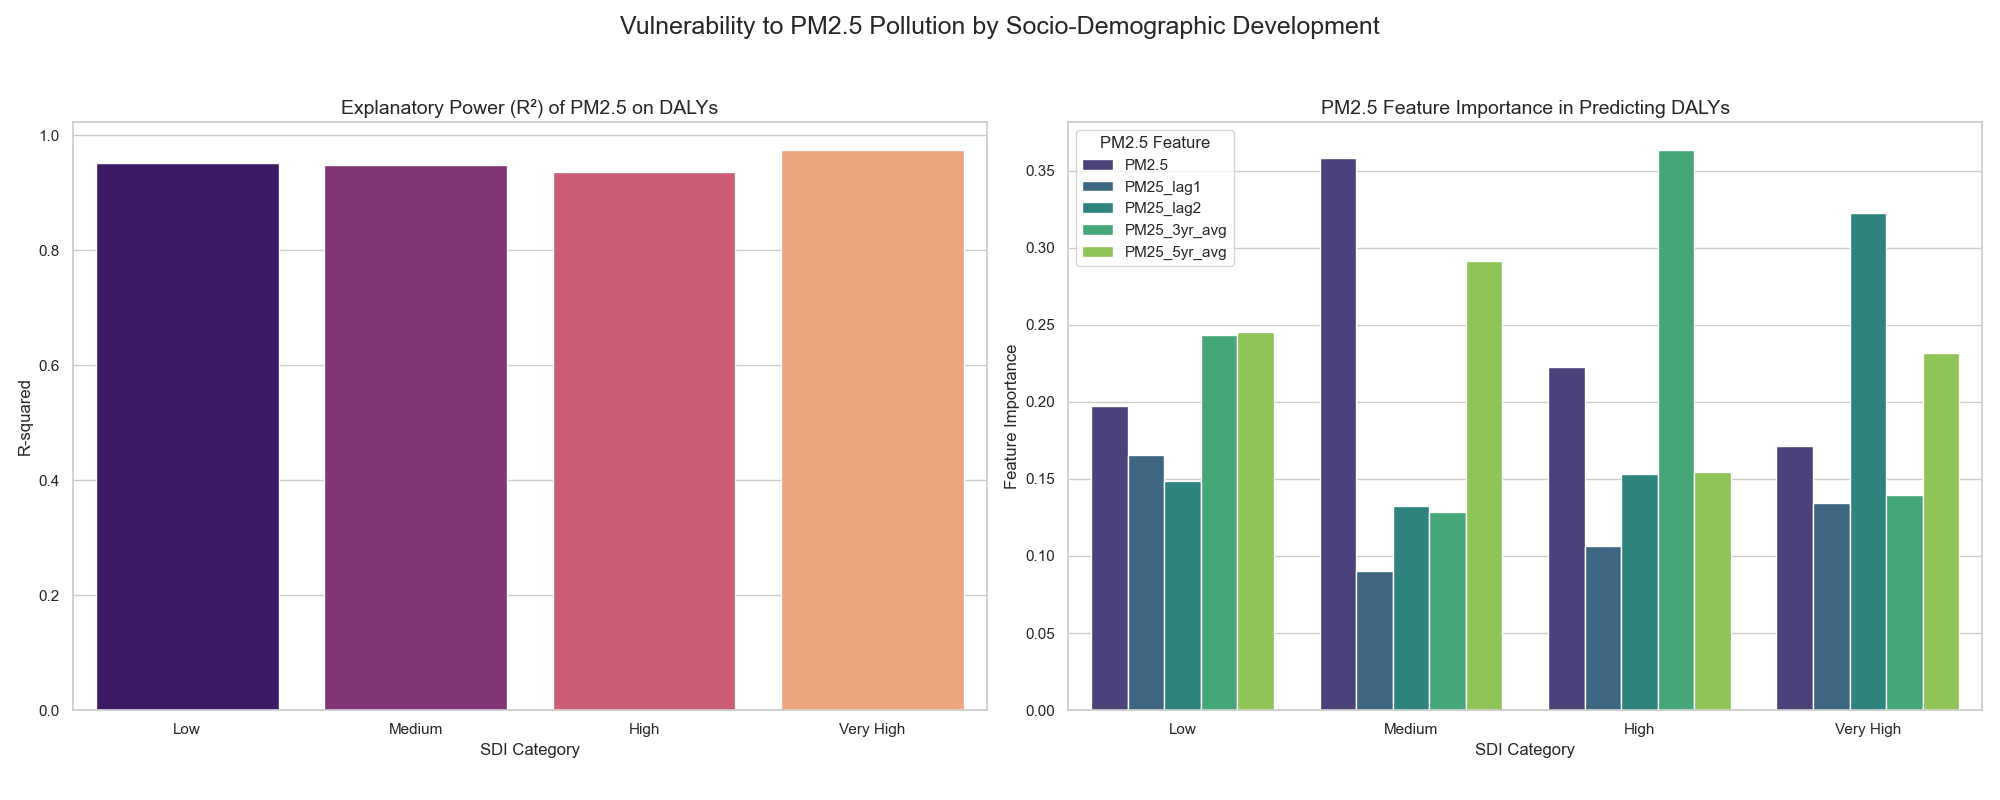


### Overall Conclusion
The evidence strongly suggests a dual-driver system for the health
burdens studied:
1.  **Socio-Demographic Development** acts as the primary determinant,
    setting a country's baseline health status.
2.  **PM₂.₅ Pollution** acts as a significant, secondary stressor that
    exacerbates this burden, with potentially greater marginal impact
    in less developed nations.

Effective public health policy should therefore focus on a two-pronged
strategy: fostering broad socio-economic improvements while
simultaneously implementing targeted air quality controls.

### Limitations
- **Ecological Fallacy:** This analysis uses country-level data, which
  may not represent the exposure and health outcomes of individuals.
- **Omitted Variables:** The models do not account for all potential
  confounders, such as smoking rates, healthcare quality, or other
  pollutants.
- **Data Accuracy:** The PM₂.₅ and DALY data are based on estimates and
  models, which have their own inherent uncertainties.


In [12]:
display(Markdown("## 4. Vulnerability, Conclusion, and Limitations"))
display(Markdown("### Vulnerability to Pollution"))
display(
    Markdown(
        "The analysis in notebook `04` revealed that populations in "
        "countries with lower SDI may be more vulnerable to the health "
        "impacts of PM₂.₅. The explanatory power of PM₂.₅ in predicting "
        "DALYs was higher in the 'Low' and 'Medium' SDI categories compared "
        "to the 'High' and 'Very High' categories."
    )
)

try:
    vuln_plot_path = (
        figure_dir / "vulnerability_plots/fig_08_vulnerability_analysis.png"
    )
    display(Image(filename=vuln_plot_path, width=900))
except FileNotFoundError:
    print("Could not find 'fig_08_vulnerability_analysis.png'.")

display(
    Markdown("""
### Overall Conclusion
The evidence strongly suggests a dual-driver system for the health
burdens studied:
1.  **Socio-Demographic Development** acts as the primary determinant,
    setting a country's baseline health status.
2.  **PM₂.₅ Pollution** acts as a significant, secondary stressor that
    exacerbates this burden, with potentially greater marginal impact
    in less developed nations.

Effective public health policy should therefore focus on a two-pronged
strategy: fostering broad socio-economic improvements while
simultaneously implementing targeted air quality controls.

### Limitations
- **Ecological Fallacy:** This analysis uses country-level data, which
  may not represent the exposure and health outcomes of individuals.
- **Omitted Variables:** The models do not account for all potential
  confounders, such as smoking rates, healthcare quality, or other
  pollutants.
- **Data Accuracy:** The PM₂.₅ and DALY data are based on estimates and
  models, which have their own inherent uncertainties.
""")
)